<a href="https://colab.research.google.com/github/Srijan-Rai/Zomato-Restaurant-Clustering-Sentiment-Analysis/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS

In [ ]:
# Importing initial necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data paths
metadata_path = "/content/drive/MyDrive/Colab Notebooks/Zomato Clustering_Sentiment Analysis/Zomato Restaurant names and Metadata.csv"
reviews_path = "/content/drive/MyDrive/Colab Notebooks/Zomato Clustering_Sentiment Analysis/Zomato Restaurant reviews.csv"

In [ ]:
# Creating dataframes
metadata = pd.read_csv(metadata_path)
reviews = pd.read_csv(reviews_path)

In [ ]:
# metadata columns
metadata.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
# reviews coulmns
reviews.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

## Head

In [ ]:
metadata.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


## Tail

In [ ]:
metadata.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [ ]:
reviews.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


## Data Analysis

Let us carry out some data preprocessing and data visualization on the given data, to obtain clean data and also to gain some more insights into the data before we start with the main objectives of our project.

### Info

In [ ]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


* In the metadata dataframe, there are no numerical features.
* The shape of this dataframe is (105,6). Hence there are 105 entries and 6 features.
* As we could see, some of the features contain null values. These null values need to be handled further

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


* In the reviews dataframe, only Pictures is the feature with the numerical values
* The shape of this dataframe is (10000, 7), hence there are 10000 entries and 7 features
* There are some features that contain null values.

### Description

Let us get some basic description of the dataframes

In [ ]:
metadata.describe(include ="all")

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
reviews.describe(include ="all")

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Duplicates in the data

In [ ]:
metadata.duplicated().sum()

0

There are no duplicate entries in the metadata dataframe.

In [ ]:
reviews.duplicated().sum()

36

Since there are some duplicates in the dataframe, we would further review these entries and decide the necessary action that needs to be taken on these duplicates.

In [ ]:
reviews[reviews.duplicated()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


Since all the entries for the duplicate restaurants are null, we would be dropping these entries

In [ ]:
reviews.drop_duplicates(inplace = True)

### Null Values in the data

In [ ]:
metadata.isna().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

As we could see there are many null values under the collections feature. These collections are different tags provided by zomato for different restaurants. With the help of these collections, it becomes easier to filter out the restaurants which belong to a particular restaurant collection.

For the null values under collections, we would replace them with "No Collection", because these restaurants belong to no collections.

In [ ]:
metadata["Collections"].fillna("No Collection", inplace = True)

Since there are only 2 null values under timings feature, we would drop these entries from the dataframe.

In [ ]:
metadata.dropna(subset = ["Timings"],inplace = True)

In [ ]:
reviews.isna().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

Let us drop all the null values which are present in the reviews data frame, as there are very less number of null values in the data frame.

In [ ]:
reviews.dropna(inplace= True)

### Feature Engineering

Let us perform some feature engineering on the available datasets, which will help us to visualize the data easily and more efficiently. This step includes cleaning the data under different features, adding necessary features into the dataset by using the existing features, converting the datatypes of the features, etc.

#### Feature Engineering on Metadata

In [ ]:
# Metadata cost datatype conversion
metadata["Cost"] = metadata["Cost"].str.replace(",","")
metadata["Cost"] = metadata["Cost"].astype("float64")

From the above step we converted the data type of "Cost

In [ ]:
def num_of_Cusines(cuisines):
  """ Function to obtain the number of cuisines
      Parameter: Cuisines under the metadata dataframe"""
  cuisinelist = list(str(cuisines).split(","))
  return len(cuisinelist)

In [ ]:
metadata["Number_of_Cusines"] = metadata["Cuisines"].apply(num_of_Cusines)

The above step creates a new feature called the number of cuisines, to obtain the number of cuisines served in a restaurant.

In [ ]:
metadata.drop(["Links","Timings"], axis = 1, inplace = True)
metadata.rename(columns={"Name":"Restaurant"},inplace = True)

The above step drops the Links and Timings features which are not necessary for our further analysis.

The Name feature is renamed as Restaurant.

#### Feature Engineering on reviews data

In [ ]:
reviews = reviews[reviews["Rating"] != "Like"]
reviews["Rating"] = reviews['Rating'].astype("float64")

Te above step converts the datatype of Rating Feature to float.

In [ ]:
reviews["Time"] = pd.to_datetime(reviews["Time"])
reviews["Day"] = reviews["Time"].dt.day_name()
reviews["Hour"] = reviews["Time"].dt.hour

Converting the datatype of "Time" to datetime and creating new features to get the day and hour from it.

In [ ]:
# Splitting the metadata into two new features
reviews['No_of_Reviews'],reviews['No_of_Followers']=reviews['Metadata'].str.split(',').str
reviews['No_of_Reviews'] = pd.to_numeric(reviews['No_of_Reviews'].str.split(' ').str[0])
reviews['No_of_Followers'] = pd.to_numeric(reviews['No_of_Followers'].str.split(' ').str[1])

Obtaining the number of reviews and followers of the restaurant reviews.

#### Datasets after feature Engineering

In [ ]:
metadata

,Restaurant,Cost,Collections,Cuisines,Number_of_Cusines
0,Beyond Flavours,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",6
1,Paradise,800.0,Hyderabad's Hottest,"Biryani, North Indian, Chinese",3
2,Flechazo,1300.0,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts",4
3,Shah Ghouse Hotel & Restaurant,800.0,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",5
4,Over The Moon Brew Company,1200.0,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...",5
...,...,...,...,...,...
100,IndiBlaze,600.0,No Collection,"Fast Food, Salad",2
101,Sweet Basket,200.0,No Collection,"Bakery, Mithai",2
102,Angaara Counts 3,500.0,No Collection,"North Indian, Biryani, Chinese",3
103,Wich Please,250.0,No Collection,Fast Food,1


In [ ]:
reviews

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Day,Hour,No_of_Reviews,No_of_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,Saturday,15,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,Saturday,14,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,Friday,22,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,Friday,22,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,Friday,21,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",2016-06-05 00:08:00,0,Sunday,0,53,54.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",2016-06-04 22:01:00,0,Saturday,22,2,53.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",2016-06-03 10:37:00,3,Friday,10,65,423.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",2016-05-31 17:22:00,0,Tuesday,17,13,144.0


### Handling Outliers

Let us check for any oultiers present in the numeric features of the  dataframes through distribution plots and boxplots.

In [ ]:
def outlier_plots(df, features):
  """ function to plot the distribution plot and boxplots for the provided features
      parameters: Dataframe and the features for which we need the plots"""
  for i in range(0,len(features)):
    plt.figure(figsize = (8,8))
    plt.subplot(1,2,1)
    sns.distplot(df[features[i]])
    plt.subplot(1,2,2)
    sns.boxplot(df[features[i]])

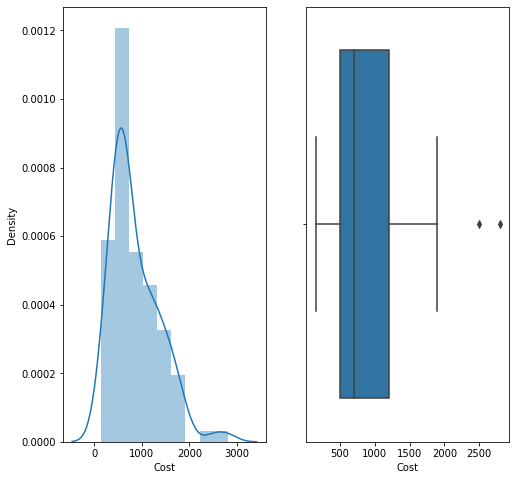

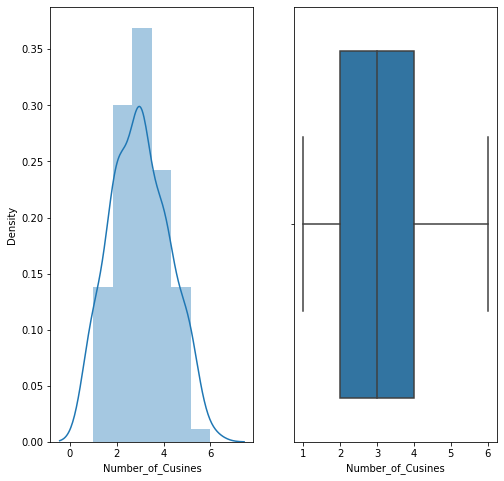

In [ ]:
outlier_plots(metadata,["Cost","Number_of_Cusines"])

From the above plots, we could conclude that there are no outliers in the metadata dataframe.

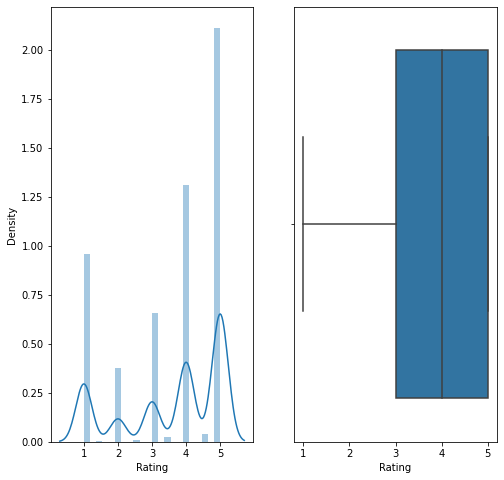

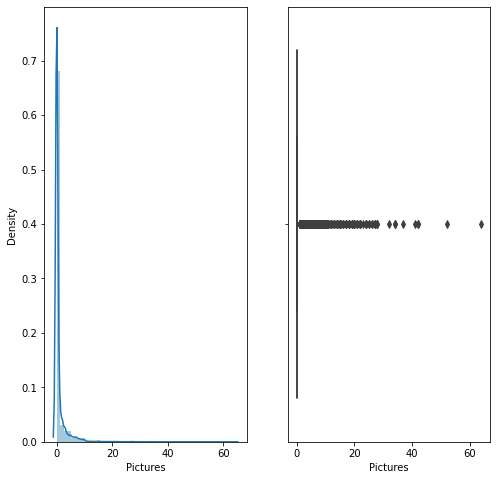

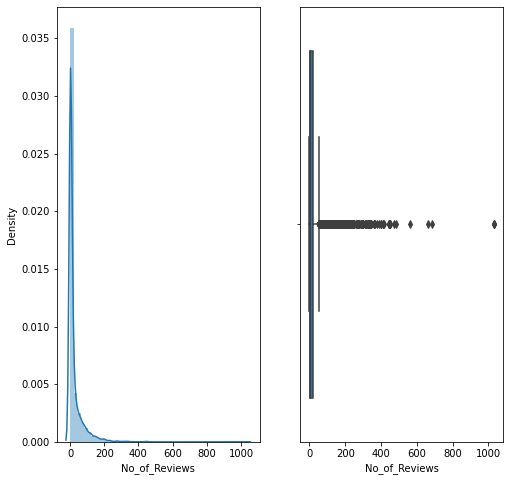

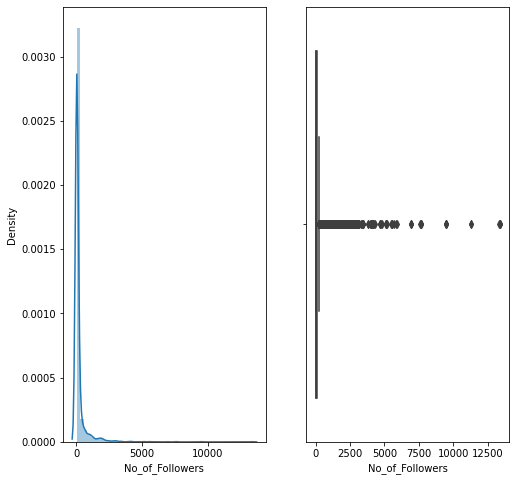

In [ ]:
outlier_plots(reviews,["Rating","Pictures","No_of_Reviews","No_of_Followers"])

From the above plots, we could see that there are some outliers in the reviews dataframe.

We would be dropping the entries which vary significantly from the rest of the entries

In [ ]:
outlier_values = np.where((reviews["Pictures"]<40) & (reviews["No_of_Reviews"]<500) & (reviews["No_of_Followers"]<6000))

In [ ]:
reviews = reviews.iloc[outlier_values]

Let us merge both the review and the metadata dataframes to obtain a single dataframe that we can for further analysis.

In [ ]:
# Getting numerical datas from reviews dataframe to perform some data visualizations.
reviews_numerical = reviews.groupby("Restaurant").agg({"Rating":"mean","Pictures":"sum","No_of_Reviews":"sum","No_of_Followers":"sum"})
reviews_numerical.columns = ["Average Ratings","Total Pictures","Total Reviews","Total Followers"]

In [ ]:
metadata_with_reviews = metadata.merge(reviews_numerical, on ="Restaurant")
metadata_with_reviews

,Restaurant,Cost,Collections,Cuisines,Number_of_Cusines,Average Ratings,Total Pictures,Total Reviews,Total Followers
0,Beyond Flavours,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",6,4.186667,38,717,10061.0
1,Paradise,800.0,Hyderabad's Hottest,"Biryani, North Indian, Chinese",3,4.720930,2,236,798.0
2,Flechazo,1300.0,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts",4,4.544118,54,624,2748.0
3,Shah Ghouse Hotel & Restaurant,800.0,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",5,3.381579,30,1399,11843.0
4,Over The Moon Brew Company,1200.0,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...",5,4.322917,44,1824,7010.0
...,...,...,...,...,...,...,...,...,...
94,Desi Bytes,400.0,No Collection,"North Indian, Chinese",2,2.975904,8,1442,10394.0
95,Hyderabadi Daawat,600.0,Food Hygiene Rated Restaurants in Hyderabad,"Hyderabadi, Chinese, Mughlai",3,3.835443,229,4342,35881.0
96,Zega - Sheraton Hyderabad Hotel,1750.0,No Collection,"Asian, Sushi",2,4.353659,75,2693,28851.0
97,Triptify,400.0,No Collection,North Indian,1,3.558140,14,1691,9355.0


### Data Visualization

In this part, we will be visualizing the merged dataframe to obtain some important insights from the dataframe

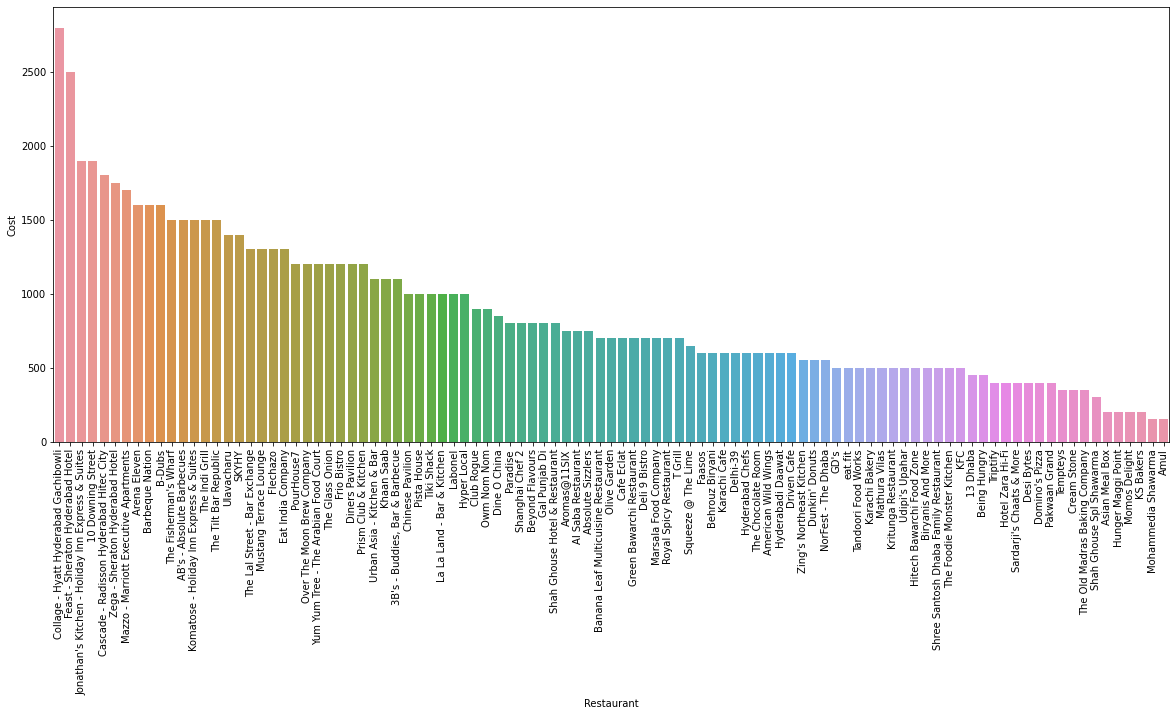

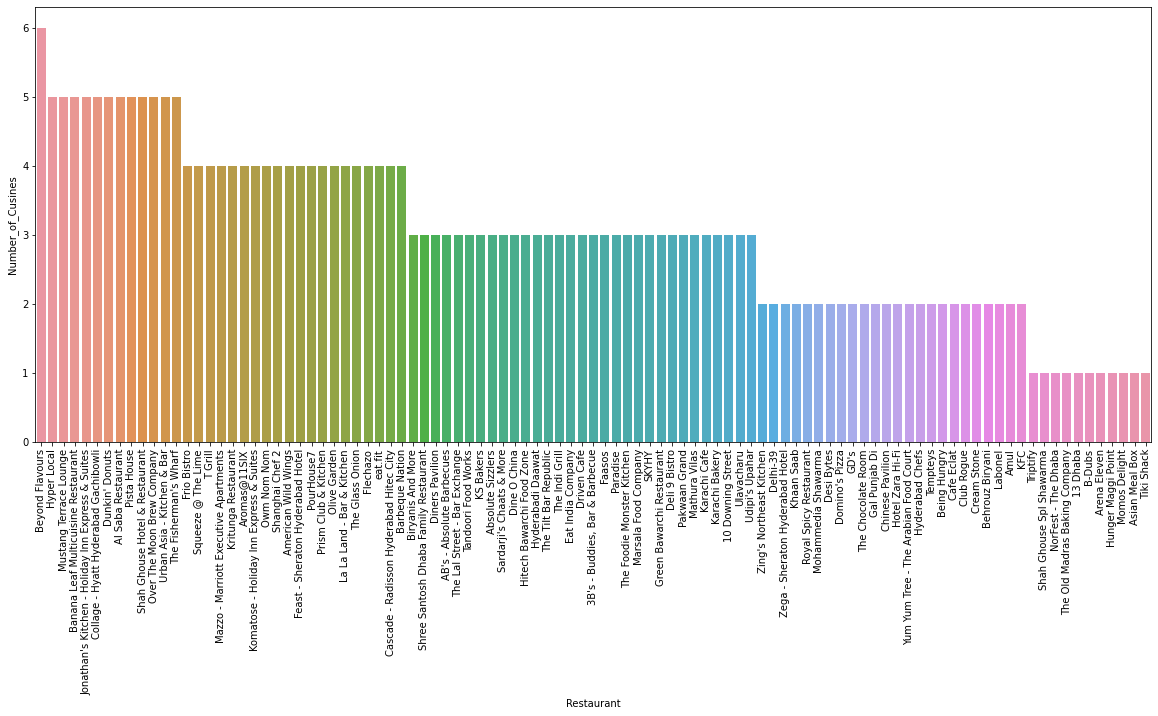

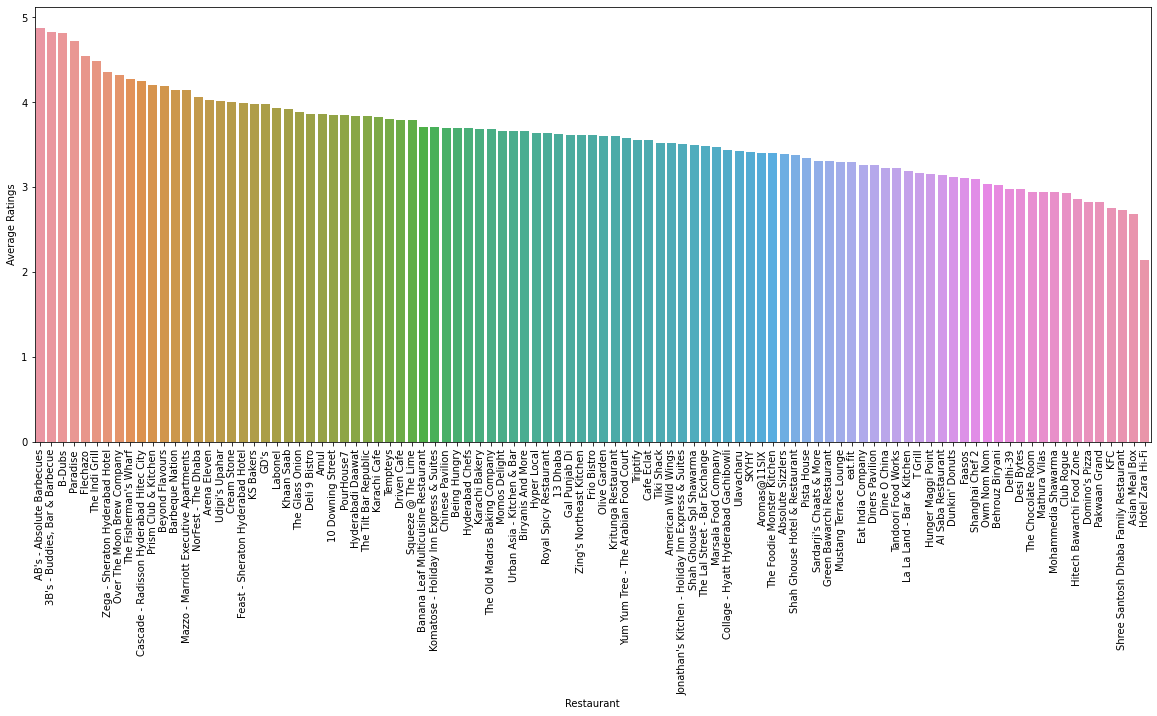

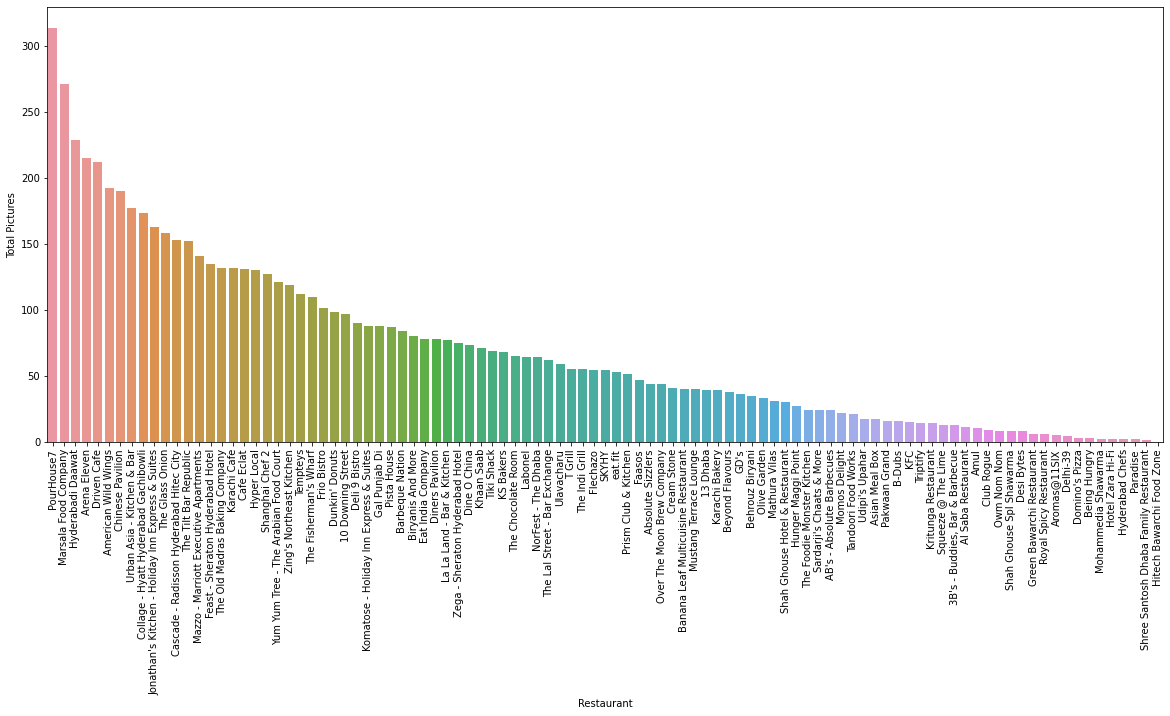

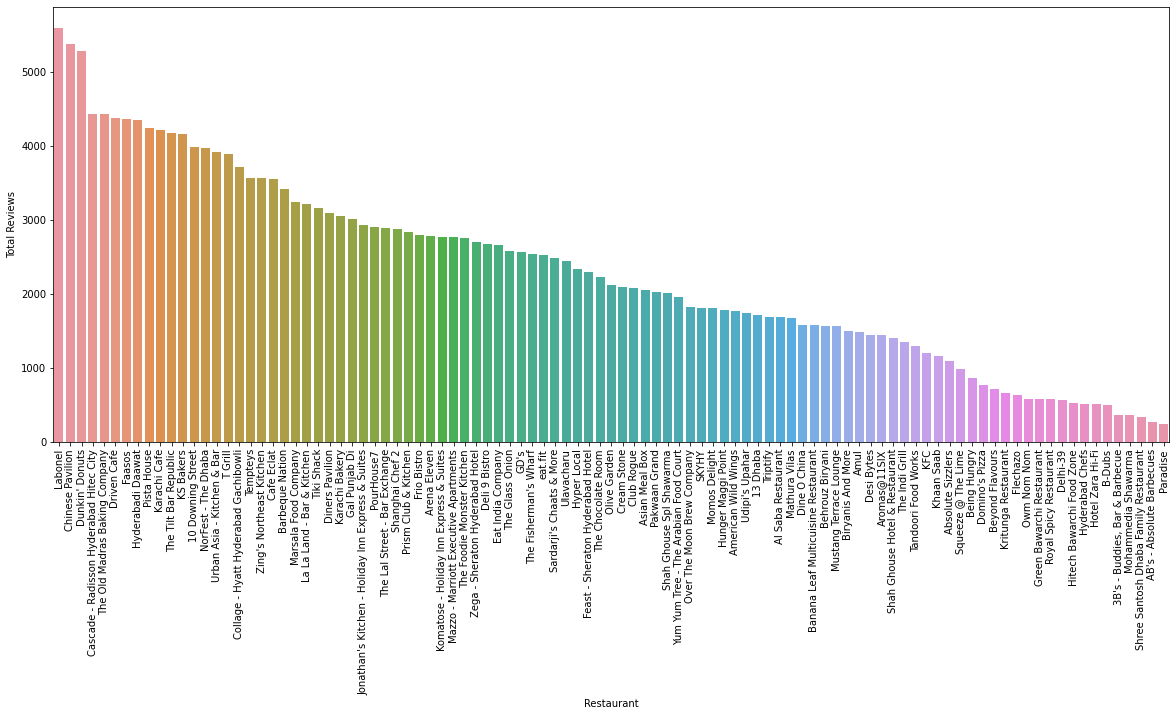

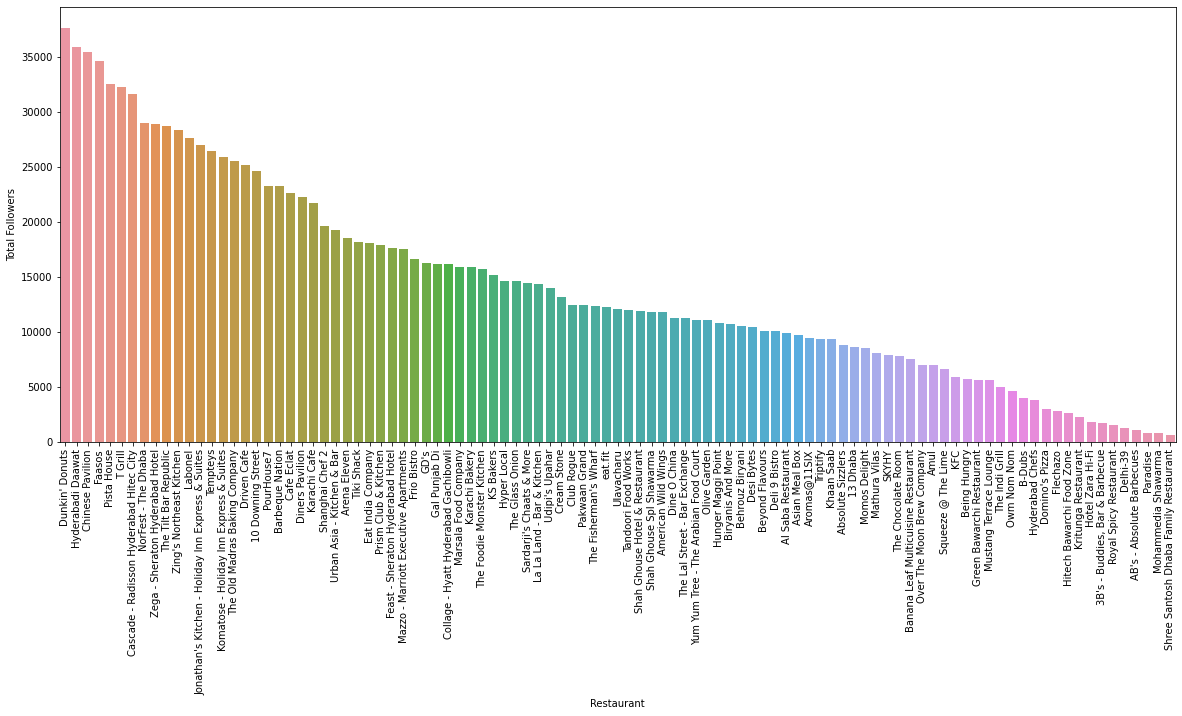

In [ ]:
for feature in ["Cost", "Number_of_Cusines","Average Ratings","Total Pictures","Total Reviews","Total Followers"]:
  plt.figure(figsize=[20,8])
  plt.xticks(rotation=90)
  sns.barplot(x= "Restaurant", y= feature , data = metadata_with_reviews.sort_values(by=feature, ascending = False))

Insights from the above boxplots:
* The top 5 costliest restaurants:

 Collage- Hyatt Hyderabad Gachibowli, Feast- Sherathon Hyderabad Hotel,      Jonathan's Kitchen- Holiday Inn Express and Suites, 10 Downing Street, Cascade - Radison Hyderabad Hitec City.
* Top 5 restaurants with highest number of cuisines:

  Beyond Flavors, Hyper Local, Mustang Terrace Lounge, Banana Leaf Multicuisine Restaurant, Jonathan's Kitchen- Holiday Inn Express and Suites.
* Top 5 highest rated restaurants:

  AB's- Absolute Barbecues, 3B's- Buddies, Bar & Barbecue, B-Dubs, Paradise, Flechazo.
* Top 5 restaurants with highest number of pictures posted in Zomato:

  PourHouse7, Marsala Food Company, Hyderabadi Dawat, Arena Eleven, Driven Cafe.
* Top 5 most reviewed restaurants:

  Labonel, Chinese Pavilion, Dunkin's Donuts, Cascade - Radison Hyderabad Hitec City, The Old Madras Baking Company.
* Top 5 restaurants with most number of followers:

  Dunkin's Donuts, Hyderabadi Dawat, Chinese Pavilion, Fasos, Pista House.   




In [ ]:
def getcount(dataFrame, columnName):
  """ Function to get the number of different cuisines and colections and also to get the count of it
      Parameters: Dataframe, Features(Cuisine/Collections)"""
  Count_df = {}
  for Collections_Cusines in dataFrame[columnName]:
    for name in Collections_Cusines.split(", "):
      if name in Count_df:
        Count_df[name] =  Count_df[name] + 1
      else:
        Count_df[name] = 1
  Count_df = pd.DataFrame(Count_df.values(), Count_df.keys(), columns = ["Count"]).reset_index()
  Count_df.rename(columns={'index': columnName}, inplace = True)
  return Count_df

In [ ]:
Collection_Count = getcount(metadata_with_reviews, "Collections" )

In [ ]:
Cuisines_Count = getcount(metadata_with_reviews, "Cuisines" )

In [ ]:
Collection_Count.sort_values(by="Count", ascending = False).head(10)

,Collections,Count
10,No Collection,49
2,Great Buffets,11
0,Food Hygiene Rated Restaurants in Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad's Hottest,7
1,Corporate Favorites,6
3,Top-Rated,5
4,Gold Curated,5
11,Trending This Week,5
14,Veggie Friendly,4


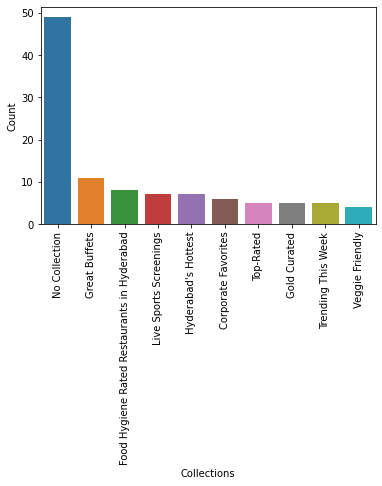

In [ ]:
plt.xticks(rotation = 90)
sns.barplot(x= "Collections", y= "Count", data = Collection_Count.sort_values(by="Count", ascending = False).head(10))

From the above plot, we could see that majority of restaurants come under No Collection, which means that majority of the restaurants are not been tagged to any collections. 

This is an important insight and Zomato can add the respective collections to these restaurants which would help to filter out these restaurants based on the collection it belongs to.

In [ ]:
Cuisines_Count.sort_values(by="Count", ascending = False).head(10)

,Cuisines,Count
5,North Indian,59
0,Chinese,41
1,Continental,21
6,Biryani,15
20,Italian,14
7,Asian,14
18,Fast Food,13
9,Desserts,13
4,South Indian,8
27,Mughlai,6


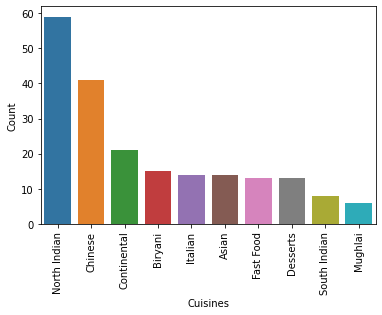

In [ ]:
plt.xticks(rotation = 90)
sns.barplot(x= "Cuisines", y= "Count", data = Cuisines_Count.sort_values(by="Count", ascending = False).head(10))

The above plot show us the top 10 cuisines served by the restaurants in Hyderabad.

In [ ]:
ratings_count = reviews["Rating"].value_counts()
ratings_count

5.0    3035
4.0    2185
1.0    1350
3.0    1079
2.0     562
4.5      66
3.5      47
2.5      18
1.5       9
Name: Rating, dtype: int64

In [ ]:
def getReviewCountPlots(feature):
  sns.countplot(reviews[feature].sort_values())
  plt.title(f"Counts of {feature}")

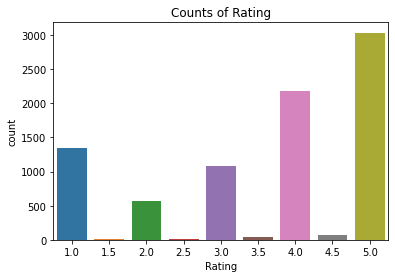

In [ ]:
getReviewCountPlots("Rating")

From the count plot on the Ratings we got to know that people tend to provide ratings on integers rather that float ratings. 

Most of the people have given 5 points as their rating.

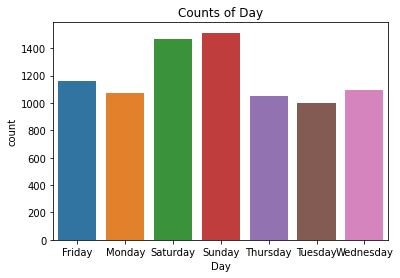

In [ ]:
getReviewCountPlots("Day")

From having an assumption as people review the restaurants only when they order food, From the above plot we could conclude that most of the people order food on Sundays and Saturdays. 

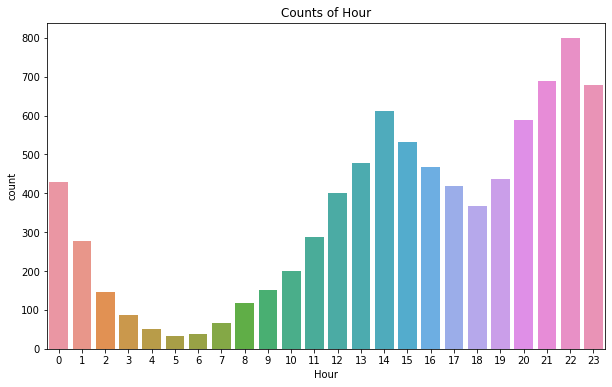

In [ ]:
plt.figure(figsize=(10,6))
getReviewCountPlots("Hour")

Most of the people order food for their lunch and dinner. 

Very less number of people order food for their breakfast.

## Restaurant Clustering

### Initial Hyothesis

* Restaurants with similar kinds of ratings can be clustered together. Ratings are done by people on the basis of food quality, service, packaging among other things.
* Restaurants with high ratings would also probably be expensive and would be having a similar pricing strategy as well. They can be clustered according to the costs.
Hence we will create clusters using the price and ratings
* Restaurants having similar cusines can be clustered together.

### Feature Engineering for Clustering

#### One Hot Encoding

Let us perform onehot encoding, to create the new cusines features which will help us to cluster the restaurants based on the cusines they serve.

In [ ]:
# Onehot encoding
for row in range(metadata_with_reviews.shape[0]):
  for cuisine_items in metadata_with_reviews.Cuisines[row].split(", "):
      metadata_with_reviews.loc[row,cuisine_items] = 1

In [ ]:
# Creating the dataframe to perform clustering
Clustering_DF = metadata_with_reviews.drop(["Total Pictures","Total Reviews","Total Followers","Collections","Cuisines"],axis = 1)
Clustering_DF.fillna(0,inplace= True)

In [ ]:
# Dataframe to be used for clustering
Clustering_DF

,Restaurant,Cost,Number_of_Cusines,Average Ratings,Chinese,Continental,Kebab,European,South Indian,North Indian,...,Hyderabadi,Cafe,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern
0,Beyond Flavours,800.0,6,4.186667,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Paradise,800.0,3,4.720930,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Flechazo,1300.0,4,4.544118,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Shah Ghouse Hotel & Restaurant,800.0,5,3.381579,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Over The Moon Brew Company,1200.0,5,4.322917,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Desi Bytes,400.0,2,2.975904,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,Hyderabadi Daawat,600.0,3,3.835443,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,Zega - Sheraton Hyderabad Hotel,1750.0,2,4.353659,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,Triptify,400.0,1,3.558140,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Scaling

Since many of our clustering algorithms depends on calculating the distance between each clusters and among the data points within the clusters. It is  better to obtain an uniform scling accross the dataframe to achieve a better model performance.

We would be using the MinMax scaler offered by scikit-learn to perfom scaling on our dataframe

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = Clustering_DF.copy()
scaled_df[["Cost","Number_of_Cusines","Average Ratings"]] = scaler.fit_transform(Clustering_DF[["Cost","Number_of_Cusines","Average Ratings"]])
scaled_df.set_index("Restaurant", inplace= True)

In [ ]:
# Final Scaled dataframe
scaled_df

,Cost,Number_of_Cusines,Average Ratings,Chinese,Continental,Kebab,European,South Indian,North Indian,Biryani,...,Hyderabadi,Cafe,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern
Restaurant,,,,,,,,,,,,,,,,,,,,,
Beyond Flavours,0.245283,1.0,0.746454,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Paradise,0.245283,0.4,0.941830,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Flechazo,0.433962,0.6,0.877171,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Shah Ghouse Hotel & Restaurant,0.245283,0.8,0.452040,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Over The Moon Brew Company,0.396226,0.8,0.796279,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Desi Bytes,0.094340,0.2,0.303688,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hyderabadi Daawat,0.169811,0.4,0.618014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zega - Sheraton Hyderabad Hotel,0.603774,0.2,0.807521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


####**Kmeans Clustering on Cost and Ratings**

In [ ]:
#importing kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

In [ ]:
#Within Cluster Sum of Squared Errors for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(scaled_df[['Cost','Average Ratings']])
    wcss.append(km.inertia_)

Text(0.5, 1.0, 'KMeans clustering while considering Cost and Average Ratings')

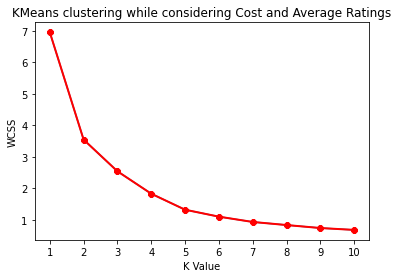

In [ ]:
#The elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.title("KMeans clustering while considering Cost and Average Ratings")

The optimal number of clusters here would be 5. It can be clearly observed that after 5 there is minimal drop in WCSS. Let's go ahead and model for 5 clusters.

In [ ]:
#create a copy
kmeans_df1 = scaled_df.copy()
#fit predict kmeans on 5 clusters
model1 = KMeans(n_clusters=5,random_state= 42)
pred_1 = model1.fit_predict(kmeans_df1[['Cost', 'Average Ratings']])
kmeans_df1["label"] = pred_1

Text(0.5, 1.0, 'Cost vs Average Rating')

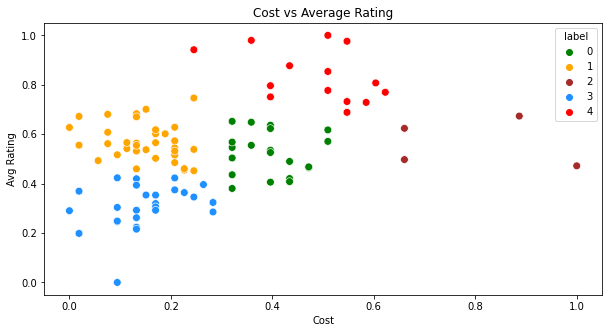

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Cost',y = 'Average Ratings',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = kmeans_df1  ,s = 60 )
plt.xlabel('Cost')
plt.ylabel('Avg Rating') 
plt.title('Cost vs Average Rating')

The clusters are pretty distinguishable from each other. Since the input variables were just two, it is easier to distinguish and interpret them.

* Label 0 are the restaurants with good rating and average pricing.
* Label 1 are the restaurants with low pricing and good rating.
* Label 2 are some expensive restaurants with good rating.
* Label 3 are the restaurants with low rating and low pricing.
* Label 4 are the restaurants whith high rating and average pricing.

From the above clusters we get to know that restaurants with low princing are more in number when compared to expensive restaurants.

####**Kmeans Clustering on clustering dataframe**


In [ ]:
wcss_all=[]
for i in range(1,11):
    km=KMeans(n_clusters=i, random_state = 11)
    km.fit(scaled_df)
    wcss_all.append(km.inertia_)

Text(0.5, 1.0, 'K Means Clustering while considering all the features')

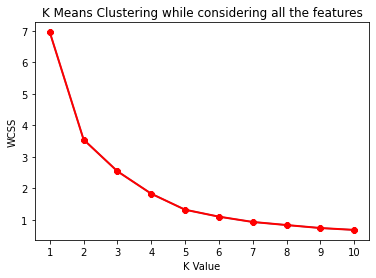

In [ ]:
#The elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.title('K Means Clustering while considering all the features')

By looking into the elbow curve we could consider the number of clusters as 3,4 or 5. 

Let us look at the silhoutte score too to obtain some better undestanding of the clusters.

In [ ]:
ShiloutteScore=[]
for i in range(2,11):
    km=KMeans(n_clusters=i, random_state = 11)
    preds = km.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, preds)
    ShiloutteScore.append(score)

Text(0.5, 1.0, ' Silhoutte Scores for different clusters')

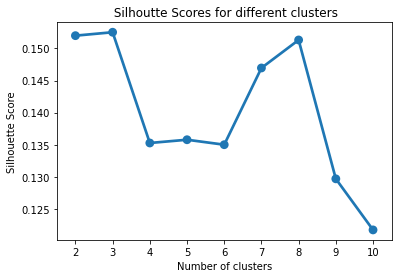

In [ ]:
sns.pointplot(list(range(2,11)),list(ShiloutteScore))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title(" Silhoutte Scores for different clusters")

From the above lineplot representing the silhoutte score, we ould consider the optimum number of clusters for the given dataframe would be 3.

In [ ]:
# Applying Kmeans clustering for 3 clusters
km=KMeans(n_clusters=3, random_state = 11)
final_preds = km.fit_predict(scaled_df)
Clustering_DF["Labels"] = final_preds

In [ ]:
# get the list of cuisines in the dataframe
cuisines_list = []
for row, columns in metadata_with_reviews.iterrows():
  for cuisines in metadata_with_reviews.loc[row, "Cuisines"].split(", "):
    if cuisines not in cuisines_list:
      cuisines_list.append(cuisines)

In [ ]:
#cluster cuisines
def cluster_cuisines(df,cluster):
  """Function to obtain the barplots of different cuisines served in different clusters
    Parameters: clusterind dataframe and cluster value"""
  pop_cuisines_df = pd.DataFrame()
  pop_cuisines_df['Cuisines'] = cuisines_list
  pop_cuisines_df['Total Restaurants'] = [df[i].sum() for i in cuisines_list]
  #visualizing cuisines
  plt.figure(figsize=(10,8))
  sns.barplot(x='Total Restaurants', y='Cuisines',data=pop_cuisines_df)
  plt.title(f'The Most Popular Cuisines in {cluster}',size=10)

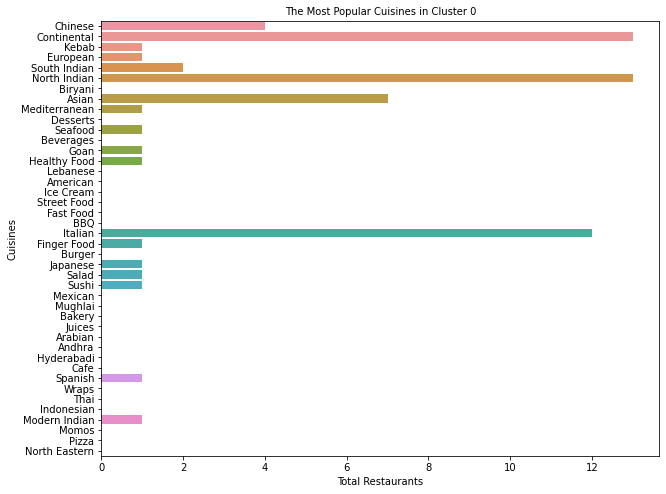

In [ ]:
# Cuisines served by Restaurants in Cluster 0
cluster_cuisines(Clustering_DF[Clustering_DF["Labels"]==0], 'Cluster 0')

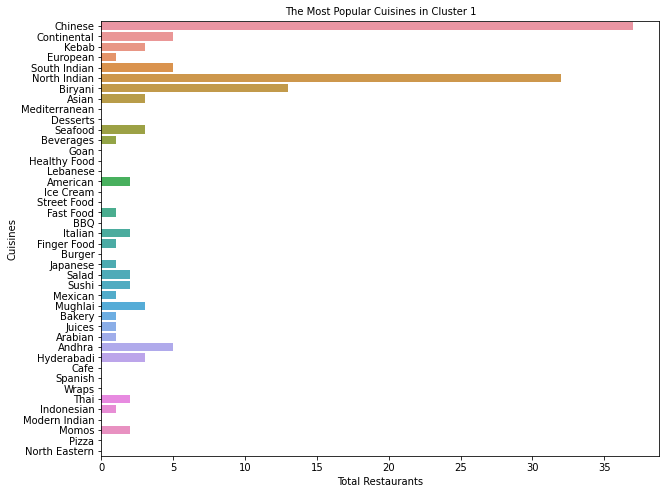

In [ ]:
# Cuisines serverd by the restaurants in cluster 1.
cluster_cuisines(Clustering_DF[Clustering_DF["Labels"]==1], 'Cluster 1')

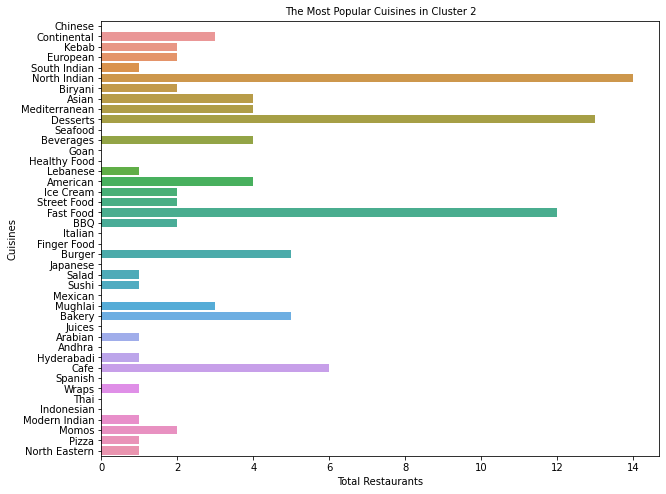

In [ ]:
# Cuisines served by restaurants in cluster 2.
cluster_cuisines(Clustering_DF[Clustering_DF["Labels"]==2], 'Cluster 2')

In [ ]:
# Get the average ratings,cost and number of restaurants for different clusters,
Clustering_DF.groupby("Labels").agg({"Average Ratings": "mean", 'Cost':"mean", "Restaurant":"count"})

,Average Ratings,Cost,Restaurant
Labels,,,
0,3.808466,1468.75,16
1,3.415759,800.00,38
2,3.664665,720.00,45


From the above plots obtained by different clusters the following insights were obtained:
* Cluster 0 are the type of restaurants that serve healthy food and hence these restaurants can be targeted to highly health-conscious people.
* Cluster 1 consists of restaurants that serve moderately healthy food, these restaurants would be recommended for casual dining.
* Cluster 2 consists of restaurants that serve unhealthy food such as Junk foods, bakeries, street food, etc. Most of the fast-food restaurants belong to these restaurants.

The above table provides the following insights: 
* Cluster 0 restaurants have a high average rating and a high average cost. Also, the number of restaurants is very limited.
* Cluster 1 restaurants have a low rating and average cost and have a considerable amount of restaurants.
* Cluster 2 restaurants have a moderate rating and a very low price and have more number of restaurants compared to other clusters.

### Hierarchical Clustering

Using hierarchical clustering algorithm let us obtain a dendrogram, to visualize different clusters in a tree form. 

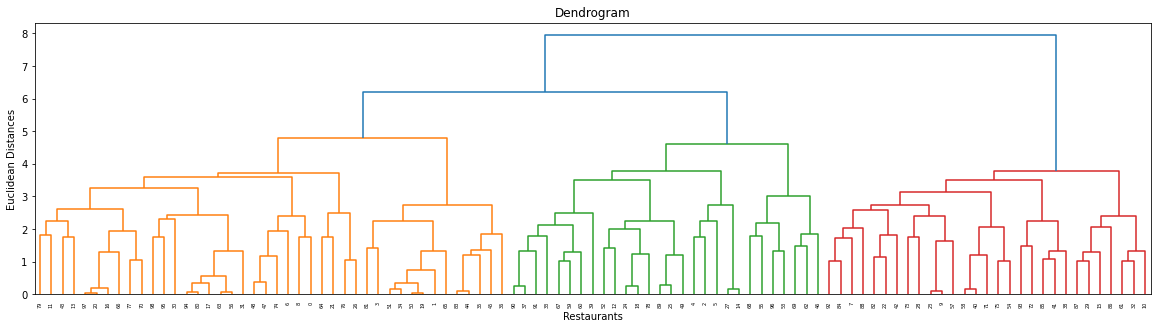

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,5))
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show() # find largest vertical distance we can make without crossing any other horizontal line

From the above dendrogram, we could see that there are 3 prominent clusters of restaurants in the dataframe

## Sentiment Analysis

Since we get a lot of reviews from the customers, it would be necesary to determine the sentiments of these reviews. We would be consider to build a supervised machine learning model to achieve the objective of determining the sentiments.

### Feature Engineering

In [ ]:
# Installing and importing necessary libraries
!pip install emot
from emot.emo_unicode import UNICODE_EMOJI # For emojis
import re

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 23 kB/s 


In [ ]:
# Converting reviews to string
reviews["Review"]= reviews["Review"].astype(str)

We would be going with supervised machine learning approach for sentiment analysis.

We would be creating a feature called sentiment which will be the dependent feature and it would say weather the sentiment is positive or not.

In [ ]:
def assign_sentiment(rating):
  """Function to create new featue to determine the sentiment"""
  if rating >=3.5:
    return 1
  else:
    return 0

The above function helps us to create the new "Sentiment" feature, where it will return the sentiment as positive when the rating is equal to or above 3.5, and negative when it is below 3.5

In [ ]:
# applying the above function
reviews["Sentiment"] = reviews["Rating"].apply(assign_sentiment)
sentiment_df = reviews[["Review","Sentiment"]]

In [ ]:
#Function to remove newline(\n) tags
def remove_newline_tag(review):
  return review.replace("\n","")

# Function to remove html tags through Regular Expressions
def remove_html_tags(text):
    """Remove html tags from a string"""
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# Function to transform the emojis to its respective text form, using UNICODE_EMOJI
def handle_emoji(text):
  for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
  return text

#function to remove punctuation from the reviews
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with empty string, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
    
# Some additional data cleaning
def clean_text(text):
  text = ''.join((x for x in text if not x.isdigit())) # remove numbers from the reviews
  text = re.sub(r"[\([{})\]]", "", text) # remove brackets from the reviews
  return text.lower() # Converting to lower case


In [ ]:
# Stopword Removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# extracting the stopwords from nltk library
stopword = stopwords.words('english')

#creating a function to remove stopwords
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stopword]
    # joining the list of words with space separator
    return " ".join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# applying all the above functions on the reviews
sentiment_df["Review"] = sentiment_df["Review"].apply(remove_newline_tag)
sentiment_df["Review"] = sentiment_df["Review"].apply(remove_html_tags)
sentiment_df["Review"] = sentiment_df["Review"].apply(handle_emoji)
sentiment_df["Review"] = sentiment_df["Review"].apply(remove_punctuation)
sentiment_df["Review"] = sentiment_df["Review"].apply(clean_text)
sentiment_df["Review"] = sentiment_df["Review"].apply(remove_stopwords)

In [ ]:
# let us visualize the words in present in positive and negative reviews through wordcloud
from wordcloud import WordCloud
positive = sentiment_df.loc[sentiment_df['Sentiment']==1,'Review']
negative = sentiment_df.loc[sentiment_df['Sentiment']==0,'Review']
text_p = " ".join(positive)
text_n = " ".join(negative)
word_cloud1 = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800,collocations = False, background_color = 'white').generate(text_p)
word_cloud2 = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800,collocations = False, background_color = 'red').generate(text_n)

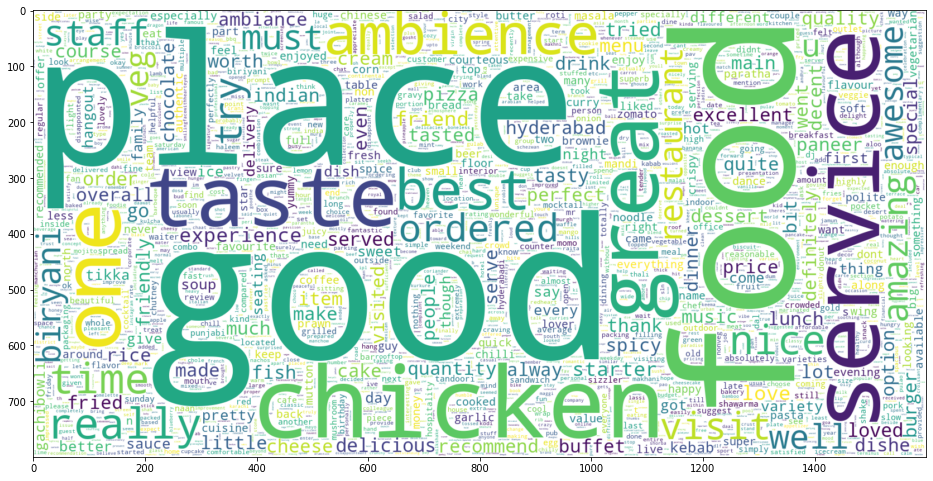

In [ ]:
# Positive reviews
plt.figure(figsize = (16,10)) 
plt.imshow(word_cloud1,interpolation = 'bilinear')

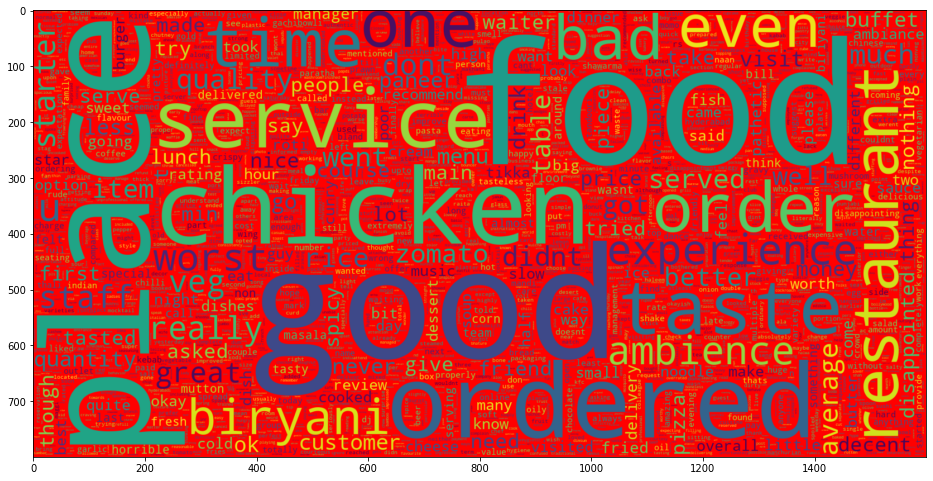

In [ ]:
# Negative reviews
plt.figure(figsize = (16,10)) 
plt.imshow(word_cloud2,interpolation = 'bilinear')

#### Stemming

Stemming is a natural language processing technique that lowers inflection in words to their root forms, hence aiding in the preprocessing of text, words, and documents for text normalization.

We would we using the snowball stemmer offered by nltk.

In [ ]:
#import stemmer
from nltk.stem.snowball import SnowballStemmer
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

#applying stemmer
sentiment_df['Review'] = sentiment_df['Review'].apply(stemming)

### Train Test Split

In [ ]:
# creating x and y varibles for independent and dependent variable
x = sentiment_df['Review']
y = sentiment_df['Sentiment']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction

In [ ]:
# creating topkens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

### Modelling

Let us create some machine learning models and test it using the necessary model metrics.

In [ ]:
#Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Model Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

In [ ]:
# List of models
models = [["Logistic Regression", LogisticRegression()], ["DecisionTree", DecisionTreeClassifier()], ["GradientBoosting",GradientBoostingClassifier()],
          ["XGBoost", XGBClassifier()],["RandomForest", RandomForestClassifier()], ["KNN", KNeighborsClassifier()],["Naive Baye's", GaussianNB()]]

In [ ]:
def buildModel(xtrain,xtest,ytrain,ytest, models):

  """
  This function builds the classification models using the traing and testing datas passed as arguments
  and returns the respective model metrics, confusion matrices and the roc curve values.
  Paramaters:
  xtrain, xtest, ytrain and ytest as pandas dataframe or numpy ndarray
  models: A list with model name and the model class. 
  """
  # creating a list to store the results of diffrent models
  model_result = []
  # dictionary for roc curve
  Curve = {}
  for modelname, method in models:
    # creating a dictionary to store the current model result
    current_result = dict()
    #Trainig and testing the models
    model = method
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    ytrainpred = model.predict(xtrain)
    ypredProb = model.predict_proba(xtest)
    # Model metrics 
    current_result["Model"] = modelname
    current_result["Train Accuracy"] = accuracy_score(ytrain,ytrainpred)
    current_result["Test Accuracy"] = accuracy_score(ytest,ypred)
    current_result["Train Precision"] = precision_score(ytrain,ytrainpred)
    current_result["Test Precision"] = precision_score(ytest,ypred)
    current_result["Train Recall"] = recall_score(ytrain, ytrainpred)
    current_result["Test Recall"] = recall_score(ytest, ypred)
    current_result["Train F1"] = f1_score(ytrain, ytrainpred)
    current_result["Test F1"] = f1_score(ytest, ypred)
    current_result["Train ROC_AUC Score"] = roc_auc_score(ytrain,ytrainpred)
    current_result["Test ROC_AUC Score"] = roc_auc_score(ytest,ypred)
    model_result.append(current_result)
    
    # ROC Curve values
    fpr, tpr, _ = roc_curve(ytest, ypredProb[:,1])
    Curve[modelname] = (fpr,tpr)
  model_result =pd.DataFrame(model_result)
  # roc curve for tpr = fpr 
  random_probs = [0 for i in range(len(ytest))]
  p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)
  Curve["TPR = FPR"] = (p_fpr, p_tpr)
  return model_result , Curve

In [ ]:
# Obtaining results
model_results, Curve = buildModel(X_train,X_test,y_train,y_test, models)

In [ ]:
model_results

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1,Train ROC_AUC Score,Test ROC_AUC Score
0,Logistic Regression,0.908351,0.863027,0.899884,0.856155,0.964401,0.940729,0.931026,0.896452,0.886252,0.835650
1,DecisionTree,0.993613,0.770594,0.993057,0.808401,0.997013,0.833587,0.995031,0.820801,0.992273,0.748400
2,GradientBoosting,0.860131,0.833812,0.843129,0.822355,0.960667,0.939210,0.898068,0.876907,0.820494,0.796677
3,XGBoost,0.844483,0.831897,0.832568,0.820173,0.948220,0.939210,0.886639,0.875664,0.803585,0.794087
4,RandomForest,0.993613,0.853927,0.992813,0.842248,0.997262,0.945289,0.995032,0.890798,0.992175,0.821738
5,KNN,0.769120,0.597222,0.783963,0.655738,0.883495,0.759878,0.830758,0.703977,0.724027,0.539913
6,Naive Baye's,0.812550,0.560824,1.000000,0.764940,0.707742,0.437690,0.828863,0.556791,0.853871,0.604208


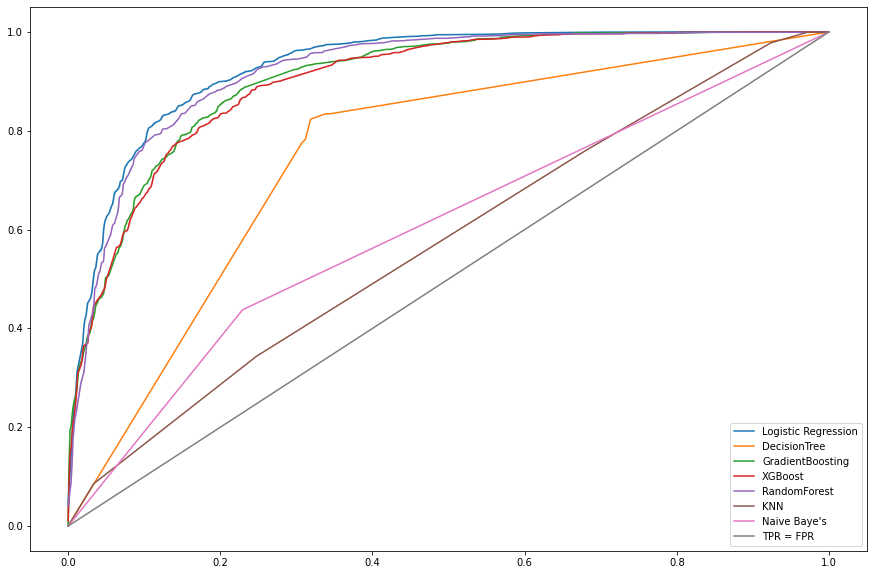

In [ ]:
# ROC_AUC curve
plt.figure(figsize = (15,10))
for model , value in Curve.items():
  sns.lineplot(value[0],value[1], label = model)

From the above model metrics and ROC-AUC cureve, we could consider that logistic regression is the best suitable model on this data, followed by RandomForest model.

Although Descision tree has a good training metrics, but it has a very poor testing metrics, showing a potential overfitting on this model.

KNN is the worst performing model for this data.

We would perform hyperparameter tuning on logistic regression model to obtain a final model on this data.



### Hyper Parameter Tuning

In [ ]:
def HPTuning(model, hyperparameters):
  
  """
  This function obtains the list of models and hyperparameters as arugments,
  performs hyperparameter tuning and 
  returns the necessary classification metrics, Confusion matrix values for the given model

  Parameters:
  model: A list with model name and model class
  hyperparameters: A dictionary of hyperparameters with its list of possible values
  """
  # List to store the metrics values after tuning
  tuning_results = []
  from sklearn.model_selection import GridSearchCV
  for modelname, modelMethod in model:
    CV = GridSearchCV(estimator = modelMethod, param_grid = hyperparameters, cv = 5, scoring= "roc_auc" )
    CV_result = dict()
    CV_result["Model"] = modelname
    CV.fit(X_train, y_train) # training the best model
    best_estimator = CV.best_estimator_
    bestPred = best_estimator.predict(X_test) # Testing the model
    bestTrainPred = best_estimator.predict(X_train)
    #Model metrics
    CV_result["Train Accuracy"] = accuracy_score(y_train,bestTrainPred)
    CV_result["Test Accuracy"] = accuracy_score(y_test,bestPred)
    CV_result["Train Precision"] = precision_score(y_train,bestTrainPred)
    CV_result["Test Precision"] = precision_score(y_test,bestPred)
    CV_result["Train Recall"] = recall_score(y_train, bestTrainPred)
    CV_result["Test Recall"] = recall_score(y_test, bestPred)
    CV_result["Train F1"] = f1_score(y_train, bestTrainPred)
    CV_result["Test F1"] = f1_score(y_test, bestPred)
    CV_result["Train ROC_AUC Score"] = roc_auc_score(y_train,bestTrainPred)
    CV_result["Test ROC_AUC Score"] = roc_auc_score(y_test,bestPred)

    tuning_results.append(CV_result)

    # Confusion Matrix
    best_cm_train = confusion_matrix(y_train,bestTrainPred)
    best_cm_Test  = confusion_matrix(y_test, bestPred)

    # best parameters
    best_params = CV.best_params_
  
  tuning_results = pd.DataFrame(tuning_results)
  return tuning_results ,best_params, best_cm_train, best_cm_Test

In [ ]:
# Logistic Regression Hyperparameters
LogisticRegressionModel = [["Logistic Regression", LogisticRegression(random_state=42)]]
LogisticRegressionParms = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],'penalty': ['l1', 'l2', 'elasticnet'], 'C': [100, 10, 1.0, 0.1, 0.01]}

In [ ]:
LGR_Result,LGR_Best_Params, LGR_Train_Cm , LGR_Test_CM = HPTuning(LogisticRegressionModel,LogisticRegressionParms)

In [ ]:
LGR_Result

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1,Train ROC_AUC Score,Test ROC_AUC Score
0,Logistic Regression,0.908351,0.863506,0.899884,0.856747,0.964401,0.940729,0.931026,0.896777,0.886252,0.836297


In [ ]:
LGR_Best_Params

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix (after Hyperparameter Tuning)')

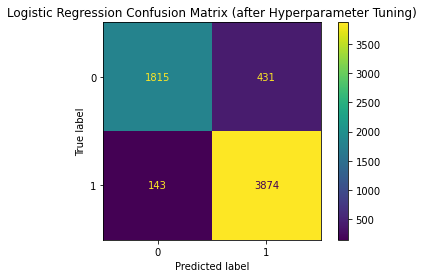

In [ ]:
#Logistic Regression Training Confusion After Hyperparameter tuning
LGR_Train_CM_Display =  ConfusionMatrixDisplay(confusion_matrix = LGR_Train_Cm)
LGR_Train_CM_Display.plot()
plt.grid(False)
plt.title("Logistic Regression Confusion Matrix (after Hyperparameter Tuning)")

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix (after Hyperparameter Tuning)')

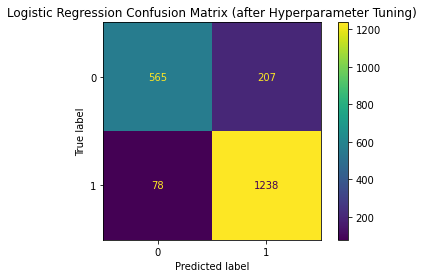

In [ ]:
#Logistic Regression Testing Confusion After Hyperparameter tuning
LGR_Train_CM_Display =  ConfusionMatrixDisplay(confusion_matrix = LGR_Test_CM)
LGR_Train_CM_Display.plot()
plt.grid(False)
plt.title("Logistic Regression Confusion Matrix (after Hyperparameter Tuning)")

From the hyperparameter tuning performed above, we could not further increase the performance of this model. Also, we could see the confusion matrix for our final model, with a good amount of true positive and true negative values.

Let us build our final model for sentiment analysis and test it by passing some custom reviews which are not present in either of the training and testing sets.

In [ ]:
final_model = LogisticRegression(random_state=42, solver='liblinear', penalty= 'l2', C = 1.0 )
final_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
def sentiment_analysis(text):
  """ Function that build the final Sentiment analysis model"""
  text_df = pd.Series(text)
  text_df = text_df.apply(remove_newline_tag)
  text_df = text_df.apply(remove_html_tags)
  text_df = text_df.apply(handle_emoji)
  text_df = text_df.apply(remove_punctuation)
  text_df = text_df.apply(clean_text)
  text_df = text_df.apply(remove_stopwords)
  text_df = text_df.apply(stemming)
  text_df = vectorizer.transform(text_df)
  text_df = text_df.toarray()
  sentiment_pred = final_model.predict(text_df)
  if sentiment_pred == 1:
    print("The sentiment of the review is Positive")
  elif sentiment_pred == 0:
    print("The sentiment of the review is Negative")
  else:
    print("Could not predict the Sentiment of the review")

Passing a positive review to test the model

In [ ]:
sentiment_analysis("It's a great experience. The ambiance is very welcoming and charming. Amazing wines, food and service. Staff are extremely knowledgeable and make great recommendations.")

The sentiment of the review is Positive


Passing a negative review to test the model

In [ ]:
sentiment_analysis("Awful. Service from start to finish was not good. Food was okay. Paid for a meal for 3, & immediately after finishing our food we were continuously asked to leave our table. When we said no (because we paid to be there) we were met with a guilt trip, rolled eyes, and heavy sighs.")

The sentiment of the review is Negative


## Conclusion

From the above data analysis, clustering and sentiment analysis on various restaurants and their reviews, the following observations were acquired:

* Barplots were obtained to visualize various parameters for all the restaurants and top 5 restaurants in different parameters were obtained.
* Majority of the restaurants serve north indian cuisines.
* Most of the people order food on weekends.
* We have obtained 5 different clusters of restaurants when we considered their ratings and cost.
* 3 different clusters of restaurants were obtained that serve healthy, moderately heathy and unhealthy food respectively.
* Sentiment analysis was carried out on the reviews posted by the users.
* Logistic Regression model was the best suited model to carry out the sentiment analysis on the given data.

